# Recommendation engines

In [1]:
import pandas as pd

user_ratings_df = pd.read_csv('./user_ratings.csv')
user_ratings_df.head()

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,5,1,4.0,847434962,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,7,1,4.5,1106635946,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
3,15,1,2.5,1510577970,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
4,17,1,4.5,1305696483,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy


In [2]:
# Get the counts of occurrences of each movie title
movie_popularity = user_ratings_df["title"].value_counts()
# Inspect the most common values
print(movie_popularity.sort_values(ascending=False).head())

Forrest Gump (1994)                 329
Shawshank Redemption, The (1994)    317
Pulp Fiction (1994)                 307
Silence of the Lambs, The (1991)    279
Matrix, The (1999)                  278
Name: title, dtype: int64


In [3]:
# Find the mean of the ratings given to each title
average_rating_df = user_ratings_df[["title", "rating"]].groupby('title').mean()

# Order the entries by highest average rating to lowest
sorted_average_ratings = average_rating_df.sort_values(by='rating', ascending=False)

# Inspect the top movies
print(sorted_average_ratings.head())

                                     rating
title                                      
Gena the Crocodile (1969)               5.0
True Stories (1986)                     5.0
Cosmic Scrat-tastrophe (2015)           5.0
Love and Pigeons (1985)                 5.0
Red Sorghum (Hong gao liang) (1987)     5.0


In [4]:
# Create a list of only the frequently watched movies
movie_popularity = user_ratings_df["title"].value_counts()
popular_movies = movie_popularity[movie_popularity > 50].index

print(popular_movies)

Index(['Forrest Gump (1994)', 'Shawshank Redemption, The (1994)',
       'Pulp Fiction (1994)', 'Silence of the Lambs, The (1991)',
       'Matrix, The (1999)', 'Star Wars: Episode IV - A New Hope (1977)',
       'Jurassic Park (1993)', 'Braveheart (1995)',
       'Terminator 2: Judgment Day (1991)', 'Schindler's List (1993)',
       ...
       'Chasing Amy (1997)', 'Mystic River (2003)',
       'Grand Budapest Hotel, The (2014)', 'Blow (2001)',
       'Army of Darkness (1993)', 'Training Day (2001)', 'Bad Boys (1995)',
       'Splash (1984)', 'Mulholland Drive (2001)',
       'The Devil's Advocate (1997)'],
      dtype='object', length=437)


In [5]:
# Use this popular_movies list to filter the original DataFrame
popular_movies_rankings = user_ratings_df[user_ratings_df["title"].isin(popular_movies)]

# Inspect the movies watched over 50 times
print(popular_movies_rankings)

       userId  movieId  rating   timestamp                 title  \
0           1        1     4.0   964982703      Toy Story (1995)   
1           5        1     4.0   847434962      Toy Story (1995)   
2           7        1     4.5  1106635946      Toy Story (1995)   
3          15        1     2.5  1510577970      Toy Story (1995)   
4          17        1     4.5  1305696483      Toy Story (1995)   
...       ...      ...     ...         ...                   ...   
79246     603     1997     4.0   953925513  Exorcist, The (1973)   
79247     606     1997     3.0  1178911117  Exorcist, The (1973)   
79248     607     1997     5.0   963079420  Exorcist, The (1973)   
79249     608     1997     4.5  1117502891  Exorcist, The (1973)   
79250     610     1997     4.0  1479543021  Exorcist, The (1973)   

                                            genres  
0      Adventure|Animation|Children|Comedy|Fantasy  
1      Adventure|Animation|Children|Comedy|Fantasy  
2      Adventure|Animati

In [6]:
# Find the average rating given to these frequently watched films
popular_movies_average_rankings = popular_movies_rankings[["title", "rating"]].groupby('title').mean()
print(popular_movies_average_rankings.sort_values(by="rating", ascending=False).head())

                                                      rating
title                                                       
Shawshank Redemption, The (1994)                    4.429022
Godfather, The (1972)                               4.289062
Fight Club (1999)                                   4.272936
Cool Hand Luke (1967)                               4.271930
Dr. Strangelove or: How I Learned to Stop Worry...  4.268041


## Permutations

In [7]:
from itertools import permutations

# Create the function to find all permutations
def find_movie_pairs(x):
  pairs = pd.DataFrame(list(permutations(x.values, 2)),
                       columns=['movie_a', 'movie_b'])
  return pairs

In [8]:
# Apply the function to the title column and reset the index
movie_combinations = user_ratings_df.groupby('userId')['title'].apply(find_movie_pairs).reset_index(drop=True)

print(movie_combinations)

                   movie_a                           movie_b
0         Toy Story (1995)           Grumpier Old Men (1995)
1         Toy Story (1995)                       Heat (1995)
2         Toy Story (1995)       Seven (a.k.a. Se7en) (1995)
3         Toy Story (1995)        Usual Suspects, The (1995)
4         Toy Story (1995)        From Dusk Till Dawn (1996)
...                    ...                               ...
60793295         31 (2016)                 Gen-X Cops (1999)
60793296         31 (2016)                  Bloodmoon (1997)
60793297         31 (2016)  Sympathy for the Underdog (1971)
60793298         31 (2016)                     Hazard (2005)
60793299         31 (2016)                Blair Witch (2016)

[60793300 rows x 2 columns]


In [9]:
# Calculate how often each item in movie_a occurs with the items in movie_b
combination_counts = movie_combinations.groupby(['movie_a', 'movie_b']).size()

# Convert the results to a DataFrame and reset the index
combination_counts_df = combination_counts.to_frame(name='size').reset_index()
print(combination_counts_df.head())

      movie_a                                     movie_b  size
0  '71 (2014)                 (500) Days of Summer (2009)     1
1  '71 (2014)                  10 Cloverfield Lane (2016)     1
2  '71 (2014)                            127 Hours (2010)     1
3  '71 (2014)  13 Assassins (Jûsan-nin no shikaku) (2010)     1
4  '71 (2014)                             13 Hours (2016)     1


In [10]:
import matplotlib.pyplot as plt

# Sort the counts from highest to lowest
combination_counts_df.sort_values('size', ascending=False, inplace=True)

combination_counts_df

,movie_a,movie_b,size
20672049,"Shawshank Redemption, The (1994)",Forrest Gump (1994),231
8538313,Forrest Gump (1994),"Shawshank Redemption, The (1994)",231
8537603,Forrest Gump (1994),Pulp Fiction (1994),230
18567035,Pulp Fiction (1994),Forrest Gump (1994),230
20675275,"Shawshank Redemption, The (1994)",Pulp Fiction (1994),222
...,...,...,...
10737102,"History Boys, The (2006)",8 Seconds (1994),1
10737100,"History Boys, The (2006)","7th Voyage of Sinbad, The (1958)",1
10737099,"History Boys, The (2006)","6th Day, The (2000)",1
10737098,"History Boys, The (2006)",54 (1998),1


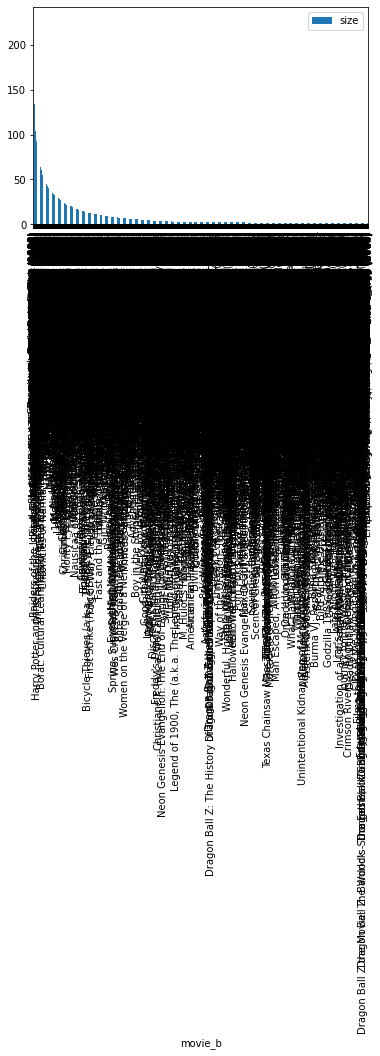

In [11]:
# Find the movies most frequently watched by people who watched Thor
thor_df = combination_counts_df[combination_counts_df['movie_a'] == 'Forrest Gump (1994)']
thor_df
# Plot the results
thor_df.plot.bar(x="movie_b")
plt.show()

## Baseado em conteúdo

In [21]:
teste = user_ratings_df[["title", "genres"]].groupby('title')["genres"].apply(pd.Series.mode)

title                                       
'71 (2014)                                 0                      Action|Drama|Thriller|War
'Hellboy': The Seeds of Creation (2004)    0    Action|Adventure|Comedy|Documentary|Fantasy
'Round Midnight (1986)                     0                                  Drama|Musical
'Salem's Lot (2004)                        0                  Drama|Horror|Mystery|Thriller
'Til There Was You (1997)                  0                                  Drama|Romance
                                                                   ...                     
eXistenZ (1999)                            0                         Action|Sci-Fi|Thriller
xXx (2002)                                 0                          Action|Crime|Thriller
xXx: State of the Union (2005)             0                          Action|Crime|Thriller
¡Three Amigos! (1986)                      0                                 Comedy|Western
À nous la liberté (Freedom for Us) 

In [15]:
# Select only the rows with values in the name column equal to Toy Story
toy_story_genres = movie_genre_df[movie_genre_df['name'] == 'Toy Story']

# Create cross-tabulated DataFrame from name and genre_list columns
movie_cross_table = pd.crosstab(movie_genre_df['name'], movie_genre_df['genre_list'])

# Select only the rows with Toy Story as the index
toy_story_genres_ct = movie_cross_table[movie_cross_table.index == 'Toy Story']
print(toy_story_genres_ct)

KeyError: 'name'

## Similarity: Jaccard
- Only binary values

In [ ]:
# Import numpy and the distance metric
import numpy as np
from sklearn.metrics import jaccard_score

# Extract just the rows containing GoldenEye and Toy Story
goldeneye_values = movie_cross_table.loc['GoldenEye'].values
toy_story_values = movie_cross_table.loc['Toy Story'].values

# Find the similarity between GoldenEye and Toy Story
print(jaccard_score(goldeneye_values, toy_story_values))

### Distance between all items

In [ ]:
# Import functions from scipy
from scipy.spatial.distance import pdist, squareform

# Calculate all pairwise distances
jaccard_distances = pdist(movie_cross_table.values, metric='jaccard')

# Convert the distances to a square matrix
jaccard_similarity_array = 1 - squareform(jaccard_distances)

# Wrap the array in a pandas DataFrame
jaccard_similarity_df = pd.DataFrame(jaccard_similarity_array, index=movie_cross_table.index, columns=movie_cross_table.index)

# Print the top 5 rows of the DataFrame
print(jaccard_similarity_df.head())

In [ ]:
# Wrap the preloaded array in a DataFrame
jaccard_similarity_df = pd.DataFrame(jaccard_similarity_array, index=movie_cross_table.index, columns=movie_cross_table.index)

# Find the values for the movie Thor
jaccard_similarity_series = jaccard_similarity_df.loc['Thor']

# Sort these values from highest to lowest
ordered_similarities = jaccard_similarity_series.sort_values(ascending=False)

# Print the results
print(ordered_similarities)

## Similarities based on text
 - Term Frequency - Inverse Document Frequency (TF-IDF)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Instantiate the vectorizer object to the vectorizer variable
vectorizer = TfidfVectorizer(min_df=2, max_df=7)

# Fit and transform the plot column
vectorized_data = vectorizer.fit_transform(df_plots['Plot'])

# Look at the features generated
print(vectorizer.get_feature_names())

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Instantiate the vectorizer object and transform the plot column
vectorizer = TfidfVectorizer(max_df=0.7, min_df=2)
vectorized_data = vectorizer.fit_transform(df_plots['Plot']) 

# Create Dataframe from TF-IDFarray
tfidf_df = pd.DataFrame(vectorized_data.toarray(), columns=vectorizer.get_feature_names())
# Assign the movie titles to the index and inspect
tfidf_df.index = df_plots['Title']
print(tfidf_df.head())

In [ ]:
# Import cosine_similarity measure
from sklearn.metrics.pairwise import cosine_similarity

# Create the array of cosine similarity values
cosine_similarity_array = cosine_similarity(tfidf_summary_df)

# Wrap the array in a pandas DataFrame
cosine_similarity_df = pd.DataFrame(cosine_similarity_array, index=tfidf_summary_df.index, columns=tfidf_summary_df.index)

# Print the top 5 rows of the DataFrame
print(cosine_similarity_df.head())

In [ ]:
# Wrap the preloaded array in a DataFrame
cosine_similarity_df = pd.DataFrame(cosine_similarity_array, index=tfidf_summary_df.index, columns=tfidf_summary_df.index)

# Find the values for the movie Rio
cosine_similarity_series = cosine_similarity_df.loc['Rio']

# Sort these values highest to lowest
ordered_similarities = cosine_similarity_series.sort_values(ascending=False)

# Print the results
print(ordered_similarities)

## User profile

In [ ]:
list_of_movies_enjoyed = ['Captain America: The First Avenger', 'Green Lantern', 'The Avengers']

# Create a subset of only the movies the user has enjoyed
movies_enjoyed_df = tfidf_summary_df.reindex(list_of_movies_enjoyed)

# Generate the user profile by finding the average scores of movies they enjoyed
user_prof = movies_enjoyed_df.mean()

# Inspect the results
print(user_prof)

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

# Find subset of tfidf_df that does not include movies in list_of_movies_enjoyed
tfidf_subset_df = tfidf_df.drop(list_of_movies_enjoyed, axis=0)

# Calculate the cosine_similarity and wrap it in a DataFrame
similarity_array = cosine_similarity(user_prof.values.reshape(1, -1), tfidf_subset_df)
similarity_df = pd.DataFrame(similarity_array.T, index=tfidf_subset_df.index, columns=["similarity_score"])

# Sort the values from high to low by the values in the similarity_score
sorted_similarity_df = similarity_df.sort_values(by="similarity_score", ascending=False)

# Inspect the most similar to the user preferences
print(sorted_similarity_df.head())

## Colaborative Filter
- Pivot method

In [ ]:
# Transform the table
user_ratings_table = user_ratings.pivot(index='userId', columns='title', values='rating')
# Inspect the transformed table
print(user_ratings_table.head())

In [ ]:
# Get the average rating for each user 
avg_ratings = user_ratings_table.mean(axis=1)

# Center each users ratings around 0
user_ratings_table_centered = user_ratings_table.sub(avg_ratings, axis=0)

# Fill in the missing data with 0s
user_ratings_table_normed = user_ratings_table_centered.fillna(0)

In [ ]:
# Transpose the user_ratings_subset DataFrame
movie_ratings_subset = user_ratings_subset.T

print(movie_ratings_subset)

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

# Assign the arrays to variables
sw_IV = movie_ratings_centered.loc['Star Wars: Episode IV - A New Hope (1977)', :].values.reshape(1, -1)
sw_V = movie_ratings_centered.loc['Star Wars: Episode V - The Empire Strikes Back (1980)', :].values.reshape(1, -1)

# Find the similarity between two Star Wars movies
similarity_A = cosine_similarity(sw_IV, sw_V)
print(similarity_A)

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

# Generate the similarity matrix
similarities = cosine_similarity(movie_ratings_centered)

# Wrap the similarities in a DataFrame
cosine_similarity_df = pd.DataFrame(similarities, index=movie_ratings_centered.index, columns=movie_ratings_centered.index)

# Find the similarity values for a specific movie
cosine_similarity_series = cosine_similarity_df.loc['Star Wars: Episode IV - A New Hope (1977)']

# Sort these values highest to lowest
ordered_similarities = cosine_similarity_series.sort_values(ascending=False)

print(ordered_similarities)

## K-Neares neighbors

In [ ]:
# Isolate the similarity scores for user_1 and sort
user_similarity_series = user_similarities.loc['user_001']
ordered_similarities = user_similarity_series.sort_values(ascending=False)

# Find the top 10 most similar users
nearest_neighbors = ordered_similarities[1:11].index

# Extract the ratings of the neighbors
neighbor_ratings = user_ratings_table.reindex(nearest_neighbors)

# Calculate the mean rating given by the users nearest neighbors
print(neighbor_ratings['Apollo 13 (1995)'].mean())

In [ ]:
# Drop the column you are trying to predict
users_to_ratings.drop("Apollo 13 (1995)", axis=1, inplace=True)

# Get the data for the user you are predicting for
target_user_x = users_to_ratings.loc[["user_001"]]

# Get the target data from user_ratings_table
other_users_y = user_ratings_table["Apollo 13 (1995)"]

# Get the data for only those that have seen the movie
other_users_x = users_to_ratings[other_users_y.notnull()]

# Remove those that have not seen the movie from the target
other_users_y.dropna(inplace=True)

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

# Instantiate the user KNN model
user_knn = KNeighborsRegressor(metric='cosine', n_neighbors=10)

# Fit the model and predict the target user
user_knn.fit(other_users_x, other_users_y)
user_user_pred = user_knn.predict(target_user_x)

print(user_user_pred)

In [ ]:
# User or Item - Based ??

# Instantiate the user KNN model
user_knn = KNeighborsRegressor()

# Fit the model and predict the target user
user_knn.fit(other_users_x, other_users_y)
user_user_pred = user_knn.predict(target_user_x)
print("The user-user model predicts {}".format(user_user_pred))

# Instantiate the user KNN model
movie_knn = KNeighborsRegressor()

# Fit the model on the movie data and predict
movie_knn.fit(other_movies_x, other_movies_y)
item_item_pred = movie_knn.predict(target_movie_x)
print("The item-item model predicts {}".format(item_item_pred))

# Spasity

In [ ]:
# Count the occupied cells
sparsity_count = user_ratings_df.isnull().values.sum()

# Count all cells
full_count = user_ratings_df.size

# Find the sparsity of the DataFrame
sparsity = sparsity_count / full_count
print(sparsity)

In [ ]:
# Count the occupied cells per column
occupied_count = user_ratings_df.notnull().sum()

# Sort the resulting series from low to high
sorted_occupied_count = occupied_count.sort_values()

# Plot a histogram of the values in sorted_occupied_count
sorted_occupied_count.hist()
plt.show()

## Matrix Factorization

In [ ]:
import numpy as np

# Multiply the user and item matrices
predictions_df = np.dot(user_matrix, item_matrix)
# Inspect the recreated DataFrame
print(predictions_df)

# Inspect the original DataFrame and compare
print(original_df)

### Singular value decomposition (SVD)

In [ ]:
# Get the average rating for each user 
avg_ratings = user_ratings_df.mean(axis=1)

# Center each user's ratings around 0
user_ratings_centered = user_ratings_df.sub(avg_ratings, axis=1)

# Fill in all missing values with 0s
user_ratings_centered.fillna(0, inplace=True)

# Print the mean of each column
print(user_ratings_centered.mean(axis=1))

In [ ]:
# Import the required libraries 
from scipy.sparse.linalg import svds
import numpy as np

# Decompose the matrix
U, sigma, Vt = svds(user_ratings_centered)

# Convert sigma into a diagonal matrix
sigma = np.diag(sigma)
print(sigma)

In [ ]:
# Dot product of U and sigma
U_sigma = np.dot(U, sigma)

# Dot product of result and Vt
U_sigma_Vt = np.dot(U_sigma, Vt)

# Add back on the row means contained in avg_ratings
uncentered_ratings = U_sigma_Vt + avg_ratings.values.reshape(-1, 1)

# Create DataFrame of the results
calc_pred_ratings_df = pd.DataFrame(uncentered_ratings, 
                                    index=user_ratings_df.index,
                                    columns=user_ratings_df.columns
                                   )
# Print both the recalculated matrix and the original 
print(calc_pred_ratings_df)
print(original_df)

# Sort the ratings of User 5 from high to low
user_5_ratings = calc_pred_ratings_df.loc['User_5',:].sort_values(ascending=True)

print(user_5_ratings)

## Validation
- RMSE

In [ ]:
# Extract the ground truth to compare your predictions against
actual_values = act_ratings_df.iloc[:20, :100].values
avg_values = avg_pred_ratings_df.iloc[:20, :100].values
predicted_values = calc_pred_ratings_df.iloc[:20, :100].values

# Create a mask of actual_values to only look at the non-missing values in the ground truth
mask = ~np.isnan(actual_values)

# Print the performance of both predictions and compare
print(mean_squared_error(actual_values[mask], avg_values[mask], squared=False))
print(mean_squared_error(actual_values[mask], predicted_values[mask], squared=False))